In [1]:
%matplotlib inline
%pylab inline

import menpo.io as mio
from menpo.feature import fast_dsift, no_op
from menpo.landmark import labeller, ibug_face_66
from menpo.visualize import visualize_images

from menpofit.aam import (
    AAMBuilder, PatchAAMBuilder, LinearAAMBuilder, LinearPatchAAMBuilder, PartsAAMBuilder,
    CRAAMFitter, PSD, PAJ)
from menpofit.visualize import visualize_aam

Populating the interactive namespace from numpy and matplotlib


## Load training data

In [2]:
training_images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/trainset/', 
                           verbose=True, max_images=None):
    i.rescale_landmarks_to_diagonal_range(200)
    i.crop_to_landmarks_proportion_inplace(0.5)
    labeller(i, 'PTS', ibug_face_66)
    if i.n_channels == 3:
        i = i.as_greyscale(mode='average')
    training_images.append(i)

- Loading 811 assets: [====================] 100%

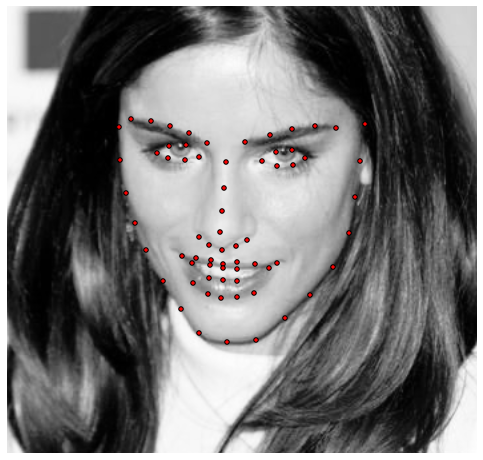

In [3]:
visualize_images(training_images)

## Load test data

In [4]:
test_images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/testset/', 
                           verbose=True, max_images=None):    
    i.rescale_landmarks_to_diagonal_range(200)
    i.crop_to_landmarks_proportion_inplace(0.5)
    labeller(i, 'PTS', ibug_face_66)
    if i.n_channels == 3:
        i = i.as_greyscale(mode='average')
    test_images.append(i)

- Loading 224 assets: [====================] 100%

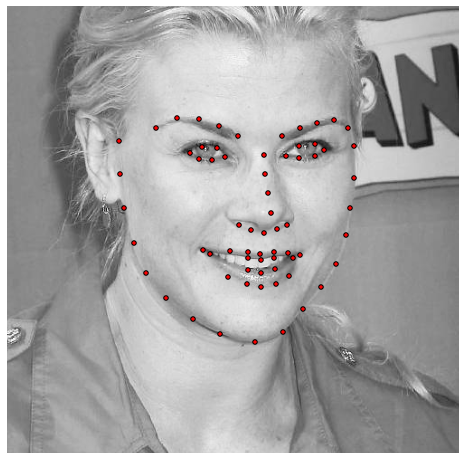

In [5]:
visualize_images(test_images)

## Build Active Appearance Models

In [6]:
features = fast_dsift
diagonal = 100
scales = (1, .5)
scale_shapes = False
scale_features = True
max_shape_components= 25
max_appearance_components = 500

patch_shape = (17, 17)

normalize_parts = no_op

#### AAM

In [7]:
aam_builder = AAMBuilder(
    features=features,
    diagonal=diagonal, 
    scales=scales, 
    scale_shapes=scale_shapes,
    scale_features=scale_features,
    max_shape_components=max_shape_components,
    max_appearance_components=max_appearance_components)

aam = aam_builder.build(
    training_images, 
    group='ibug_face_66', 
    verbose=True)

- Building models
  - Level 0: Done
  - Level 1: Done


#### Patch based AAM

In [8]:
# patch_aam_builder = PatchAAMBuilder(
#     patch_shape=patch_shape,
#     features=features,
#     diagonal=diagonal, 
#     scales=scales, 
#     scale_shapes=scale_shapes,
#     scale_features=scale_features,
#     max_shape_components=max_shape_components,
#     max_appearance_components=max_appearance_components)

# patch_aam = patch_aam_builder.build(
#     training_images, 
#     group='ibug_face_66', 
#     verbose=True)

#### Linear AAM

In [9]:
# linear_aam_builder = LinearAAMBuilder(
#     features=features,
#     diagonal=diagonal, 
#     scales=scales, 
#     scale_shapes=scale_shapes,
#     scale_features=scale_features,
#     max_shape_components=max_shape_components,
#     max_appearance_components=max_appearance_components)

# linear_aam = linear_aam_builder.build(
#     training_images, 
#     group='ibug_face_66', 
#     verbose=True)

#### Linear Patch based AAM

In [10]:
# linear_patch_aam_builder = LinearPatchAAMBuilder(
#     patch_shape=patch_shape,
#     features=features,
#     diagonal=diagonal, 
#     scales=scales, 
#     scale_shapes=scale_shapes,
#     scale_features=scale_features,
#     max_shape_components=max_shape_components,
#     max_appearance_components=max_appearance_components)

# linear_patch_aam = linear_patch_aam_builder.build(
#     training_images, 
#     group='ibug_face_66', 
#     verbose=True)

#### Parts based AAM

In [11]:
# parts_aam_builder = PartsAAMBuilder(
#     patch_shape=patch_shape, 
#     features=features,
#     normalize_parts=normalize_parts,
#     diagonal=diagonal, 
#     scales=scales, 
#     scale_shapes=scale_shapes,
#     scale_features=scale_features,
#     max_shape_components=max_shape_components,
#     max_appearance_components=max_appearance_components)

# parts_aam = parts_aam_builder.build(
#     training_images, 
#     group='ibug_face_66', 
#     verbose=True)

## Fit Active Appearance Models

In [13]:
cr_algorithm_cls = PAJ
sampling_step = 4

#### AAM Fitter

In [14]:
aam_fitter = CRAAMFitter(
    aam, 
    cr_algorithm_cls=cr_algorithm_cls, 
    n_shape=[3, 12], 
    n_appearance=[50, 100],
    n_perturbations=25,
    sampling=sampling_step)

aam_fitter.train(
    training_images, 
    group='ibug_face_66', 
    verbose=True,
    iters=5,
    gamma=1)

- Normalizing images size: Done
- Regression RMSE is 27.70168.
- Regression RMSE is 22.21066.
- Regression RMSE is 18.47768.
- Regression RMSE is 16.79453.
- Regression RMSE is 16.07885.
- Regression RMSE is 15.99973.
- Regression RMSE is 15.73837.
- Regression RMSE is 15.91421.
- Regression RMSE is 15.76386.
- Regression RMSE is 15.88421.
- Regression RMSE is 20.64437.
- Regression RMSE is 18.20883.
- Regression RMSE is 17.30197.
- Regression RMSE is 16.46024.
- Regression RMSE is 16.23644.
- Regression RMSE is 15.75442.
- Regression RMSE is 15.72925.
- Regression RMSE is 15.42268.
- Regression RMSE is 15.54109.
- Regression RMSE is 15.39066.


#### Patch based AAM Fitter

In [ ]:
patch_aam_fitter = LKAAMFitter(
    patch_aam, 
    cr_algorithm_cls=algorithm_cls, 
    n_shape=[3, 12], 
    n_appearance=[25, 50],
    sampling=sampling_step)

#### Linear AAM Fitter

In [ ]:
linear_aam_fitter = LKAAMFitter(
    linear_aam, 
    algorithm_cls=algorithm_cls, 
    n_shape=[3, 12], 
    n_appearance=[25, 50],
    sampling=sampling_step)

#### Linear Patch based AAM Fitter

In [ ]:
linear_patch_aam_fitter = LKAAMFitter(
    linear_patch_aam, 
    algorithm_cls=algorithm_cls, 
    n_shape=[3, 12], 
    n_appearance=[25, 50],
    sampling=sampling_step)

#### Parts based AAM Fitter

In [ ]:
sampling_mask = parts_mask = np.require(np.zeros(patch_shape, dtype=np.bool))
sampling_mask[2::4, 2::4] = True

imshow(sampling_mask)

In [ ]:
parts_aam_fitter = LKAAMFitter(
    parts_aam, 
    algorithm_cls=algorithm_cls, 
    n_shape=[3, 12], 
    n_appearance=[25, 50],
    sampling=sampling_mask)

#### Fitting loop

In [ ]:
#np.random.seed(seed=1)

fitters = [aam_fitter,
           patch_aam_fitter,
           linear_aam_fitter,
           linear_patch_aam_fitter,
           parts_aam_fitter]

fitters_results = [[]] * len(fitters)

for j, i in enumerate(test_images):
    
    gt_s = i.landmarks['ibug_face_66'].lms
    s = fitters[0].perturb_shape(gt_s, noise_std=20)

    for k, fitter in enumerate(fitters):
        
        fr = fitter.fit(i, s, gt_shape=gt_s, max_iters=20) 
        fitters_results[k].append(fr)
    
        print 'Image: ', j
        print fr

## Visualize Results

In [ ]:
fitted_images = [fr.fitted_image for frs in fitters_results for fr in frs]

In [ ]:
visualize_images(fitted_images)